# Exploring word embeddings in *Candide* and *Dictionnaire Européens des Lumières* 

This is just an exploration of nouns in Voltaires novel Candide (1759) and entries in the "Dictionnaire Européens des Lumières" (1997) to become familiar with word embeddings.

![Candide](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Voltaire_-_Candide_-_Tri%C3%A8re_-_Moreau.jpg/371px-Voltaire_-_Candide_-_Tri%C3%A8re_-_Moreau.jpg "Candide")

Let's start by importing some libraries: 

In [153]:
import spacy
import fr_core_news_md
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
# Import a few new things for 3-D plotting. 
from mpl_toolkits.mplot3d import Axes3D, proj3d
# This magic command is used for interactive plots. 
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8) 

We open Voltaires novel and split it on every word "Chapitre".

In [ ]:
voltaire_candide = open('voltaire_candide.txt').read()
parts = voltaire_candide.split('CHAPITRE')

In [9]:
nlp = fr_core_news_md.load()

How long is the text?

In [29]:
len(voltaire_candide)

188442

Processing the text with Spacy (transformation in an nlp object): 


In [8]:
doc = nlp(voltaire_candide)


Let's plot all the nouns in "Candide". 

In [104]:
nouns = [w for w in doc if w.pos_ == "NOUN"]

How many nouns are there?

In [11]:
len(nouns)

5905

In [ ]:
for token in nouns:
    print(token.lemma_)

Grab all the vectors for all the nouns, then make a list of labels while we're at it. For visibility reasons, we just take 40. 

In [199]:
candidevecs = [w.vector for w in (nouns[105:145])]
candidelabels = [w.string.strip() for w in (nouns[105:145])]
print(nouns[105:145])

[degré, bonheur, mademoiselle, Cunégonde, jours, maître, philosophe, province, conséquent, terre, jour, château, bois, parc, broussailles, docteur, leçon, femme, chambre, mère, brune, mademoiselle, dispositions, sciences, expériences, témoin, raison, docteur, effets, causes, agitée, remplie, désir, raison, Candide, château, bonjour, voix, lendemain, dîner]


In [135]:
delentries = nlp(open("../del/del.txt").read())
delvecs = [w.vector for w in (delentries)]


Appending the vectors of the "Dictionnaire Européen des Lumières" to the list of vectors of all of the nouns of Voltaires Candide: 

In [136]:
candidevecs.append(delvecs)

In [200]:
pca = PCA(n_components=3)

In [201]:
pcaOut = pca.fit_transform(candidevecs)

In [202]:
pcaOut.shape

(40, 3)

In [203]:
def plotResults(df, candidelabels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(candidelabels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

In [204]:
df = pd.DataFrame(pcaOut)

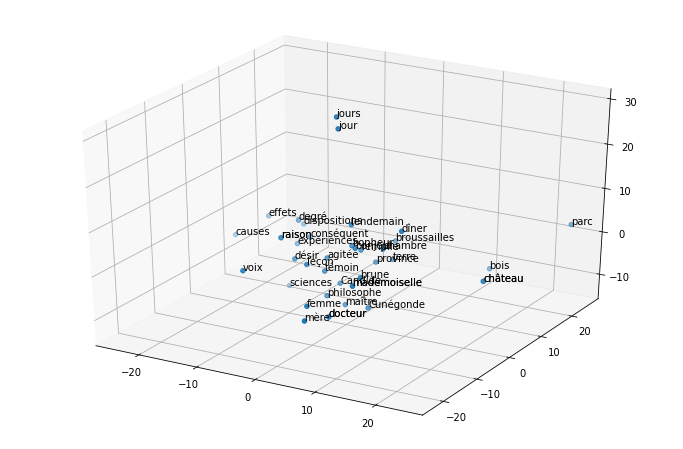

In [205]:
plotResults(df, candidelabels)

Plotting the "Dictionnaire européen des Lumières" entries (list is only an outtake for the moment). 

In [163]:
pcaOut = pca.fit_transform(delvecs)

In [164]:
dellabels = [w.string.strip() for w in (delentries)]

In [165]:
def plotResults(df, dellabels): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], marker='o')
    for i, label in enumerate(dellabels):
        ax.text(df.loc[i][0], df.loc[i][1], df.loc[i][2], label)

In [166]:
df = pd.DataFrame(pcaOut)

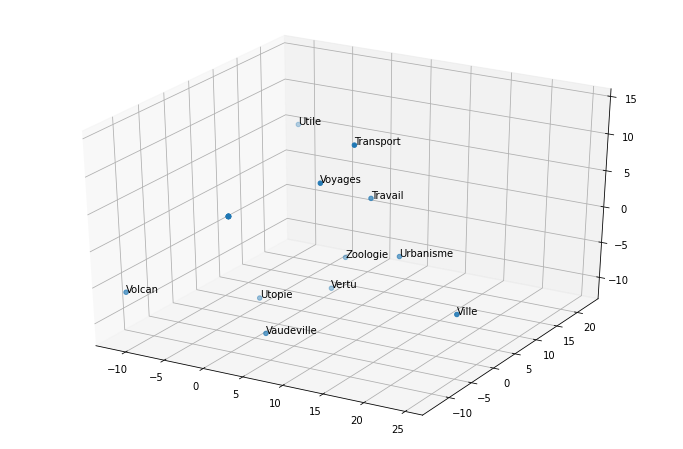

In [167]:
plotResults(df, dellabels)

In [206]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(candidevecs)

A single vector is 300-dimensional, so in order to plot it in 2D, it might help to reduce the dimensionality to the most meaningful dimensions. We can use Scikit-Learn to perform truncated singular value decomposition for latent semantic analysis (LSA). 

Plotting the 40 nouns from "Candide" in 2D. 

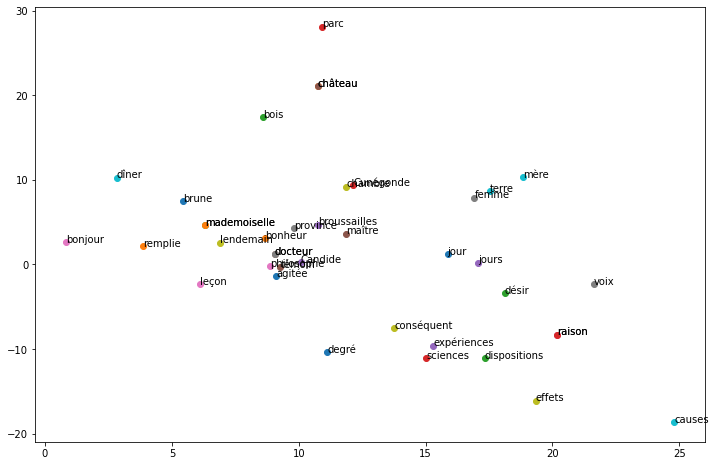

In [207]:
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(candidelabels[i], (xs[i], ys[i]))

Plotting the entries (outtakes, not full list) from "Dictionnaire européen des Lumières" in 2D. 

In [208]:
lsaOut2 = lsa.fit_transform(delvecs)

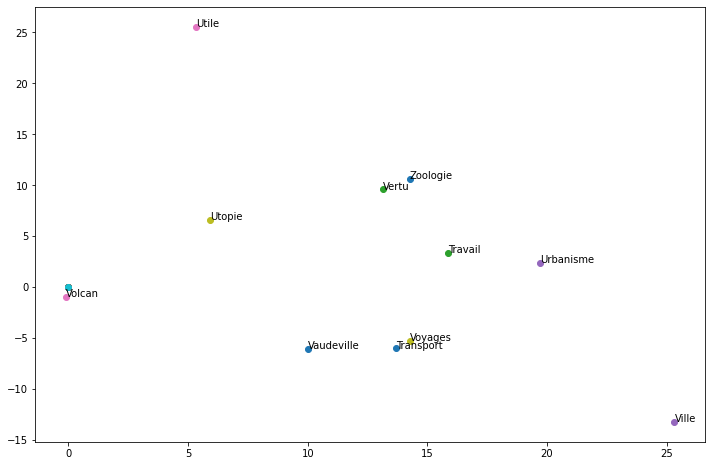

In [209]:
xs, ys = lsaOut2[:,0], lsaOut2[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(dellabels[i], (xs[i], ys[i]))

Reference for the code see:  Jonathan Reeve (Group for Experimental Methods in the Humanities, Columbia University). https://colab.research.google.com/github/explosion/spacy-notebooks/blob/master/notebooks/conference_notebooks/advanced_text_analysis.ipynb#scrollTo=hX4CRuppHkVj 

data: https://github.com/MiMoText/roman18/blob/308f2962849a82977ec79489727f30014f260a5f/XML-TEI/files/Voltaire_Candide.xml